# **Kütüphanelerin Eklenmesi**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# **Veri Setini Yükleyin ve Ön İşleyin**

In [15]:
# Fashion MNIST veri setinin yüklenmesi
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [5]:
## X_train boyut,
X_train.shape

(60000, 784)

In [6]:
y_train.shape

(60000,)

In [7]:
X_test.shape

(10000, 784)

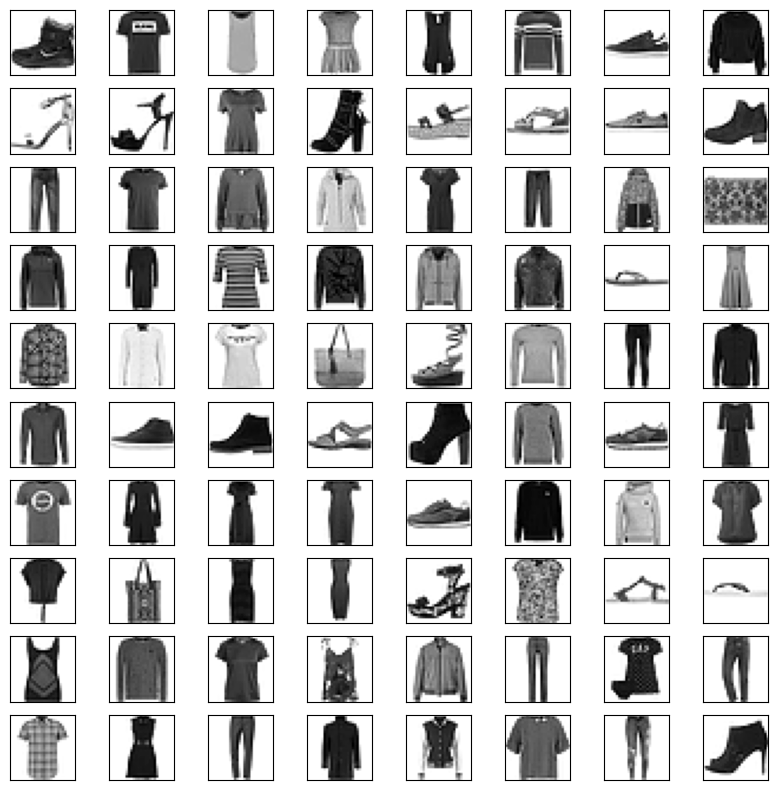

In [16]:
## 80 görüntüyü görselleştirelim

plt.figure(figsize=(10,10))

for i in range(80):
    plt.subplot(10,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [17]:
# Verilerin normalize edilmesi
X_train = X_train / 255.0
X_test = X_test / 255.0

# Görüntülerin düzlenmesi
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# **Model Oluşturma ve Eğitme**

In [18]:
# Logistic Regression Modeli
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Random Forest Modeli
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

# **Modeli Değerlendirme**

In [19]:
# Logistic Regression için tahminler
y_pred_logistic = logistic_model.predict(X_test)

# Random Forest için tahminler
y_pred_rf = rf_model.predict(X_test)

# Değerlendirme Metrikleri
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

print("Logistic Regression Modeli Değerlendirme:")
evaluate_model(y_test, y_pred_logistic)

print("Random Forest Modeli Değerlendirme:")
evaluate_model(y_test, y_pred_rf)

Logistic Regression Modeli Değerlendirme:
Accuracy: 0.8445
Precision: 0.8434
Recall: 0.8445
F1-score: 0.8437

Confusion Matrix:
[[806   2  11  53   4   2 111   0  11   0]
 [  4 958   3  26   4   0   3   0   2   0]
 [ 24   3 738  10 124   0  88   1  12   0]
 [ 24  17  18 861  30   0  39   0  11   0]
 [  0   2 112  37 765   0  77   0   7   0]
 [  0   0   0   1   0 921   0  48   7  23]
 [142   1 122  39 100   0 573   0  23   0]
 [  0   0   0   0   0  33   0 941   0  26]
 [  7   1   8  14   4   6  22   5 933   0]
 [  0   1   0   0   0  12   1  37   0 949]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.96      0.97      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.86      0.84      1000
           4       0.74      0.77      0.75      1000
           5       0.95      0.92      0.93      1000
           6       0.63      0.57     